### Introdução

O conjunto de dados Global Data on Sustainable Energy, disponibilizado no Kaggle, reúne informações detalhadas sobre consumo energético, fontes renováveis, emissões de CO₂, acesso à eletricidade e indicadores econômicos para países de todo o mundo. Esses dados são fundamentais para o monitoramento do progresso em sustentabilidade energética, planejamento de políticas públicas e análise comparativa entre diferentes regiões e faixas de renda.

A natureza quantitativa dessas informações permite a aplicação de métodos estatísticos adequados para dados de contagem, com destaque para os Modelos Lineares Generalizados (GLM), que possibilitam investigar fatores associados ao número de projetos ou eventos relacionados à energia renovável implementados em cada país.

### O Banco de Dados

O banco de dados contém registros anuais agregados por país, contemplando variáveis como população, consumo total de energia, consumo de energia renovável, emissões de CO₂, acesso à eletricidade, intensidade energética e PIB. Também inclui informações categóricas sobre região geográfica e faixa de renda, permitindo comparações espaciais e socioeconômicas.

Essa estrutura possibilita a **análise de contagens de eventos relacionados à energia, como o número de projetos de energia renovável implementados por país/ano**, bem como a investigação de padrões de consumo e emissão de carbono em diferentes contextos socioeconômicos e geográficos.

### Modelagem Estatística (GLM)

A variável resposta principal — número de projetos de energia renovável implementados — é caracterizada como dado de contagem, assumindo valores inteiros não negativos. Nesse contexto, a análise é conduzida por meio de Modelos Lineares Generalizados (GLM), permitindo modelar a relação entre a variável resposta e um conjunto de covariáveis explicativas, como população, consumo energético, emissões de CO₂, acesso à eletricidade, PIB, região e faixa de renda.

Inicialmente, pode-se empregar a distribuição Poisson, adequada para modelagem de contagens sob a suposição de igualdade entre média e variância. Contudo, devido à heterogeneidade entre países e à variabilidade observada nos dados de energia, é comum a ocorrência de sobredispersão, tornando a Binomial Negativa uma alternativa mais apropriada. Essas abordagens possibilitam a identificação de fatores associados à implementação de projetos de energia renovável e a avaliação de diferenças entre países e regiões

In [78]:
import kagglehub
import pandas as pd

# Download latest version
#path = kagglehub.dataset_download("andersonfranca/sistema-de-informaes-hospitalares-sus")


# df = pd.read_csv(
#    "RD202412.csv",
#    sep=";",
#    encoding="latin1",
#    low_memory=False
# )


df= pd.read_csv(
    "global-data-on-sustainable-energy (1).csv",
    sep=",",
    encoding="latin1",
    low_memory=False
)


In [79]:
import pandas as pd
import numpy as np

# Renomear colunas (português, mas fiel ao original)
df = df.rename(columns={
    "Entity": "regiao",
    "Access to electricity (% of population)": "pct_acesso_eletricidade",
    "Primary energy consumption per capita (kWh/person)": "consumo_energia_primaria_kwh_per_capita",
    "Renewables (% equivalent primary energy)": "pct_energia_renovaveis_primaria",
    "Value_co2_emissions_kt_by_country": "co2_emissoes_tm_per_capita",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": "intensidade_energia_mj_por_pib_ppp", 
    "Renewable-electricity-generating-capacity-per-capita": "capacidade_eletrica_renovavel_per_capita", #per_capita ou por_pessoa é mesma coisa
    "gdp_per_capita": "pib_per_capita",
    "Density\\n(P/Km2)": "densidade_populacional"
})

# Seleção de variáveis
cols = [
    "regiao",
    "pib_per_capita",
    "consumo_energia_primaria_kwh_per_capita",
    "pct_energia_renovaveis_primaria",
    "co2_emissoes_tm_per_capita",
    "pct_acesso_eletricidade",
    "intensidade_energia_mj_por_pib_ppp",
    "capacidade_eletrica_renovavel_per_capita",
    "densidade_populacional"
]

df['densidade_populacional'] = df['densidade_populacional'].str.replace(',', '').astype(float)

# Conversão de tipos
df_energy_filtrado = df[cols].copy()
df_energy_filtrado = df_energy_filtrado.astype({
    "pib_per_capita": float,
    "consumo_energia_primaria_kwh_per_capita": float,
    "pct_energia_renovaveis_primaria": float,
    "co2_emissoes_tm_per_capita": float,
    "pct_acesso_eletricidade": float,
    "intensidade_energia_mj_por_pib_ppp": float,
    "regiao": "category",
    "capacidade_eletrica_renovavel_per_capita": float,
})

# Remover outros NA
df_energy_filtrado = df_energy_filtrado.dropna()
df_energy_filtrado.head()




,regiao,pib_per_capita,consumo_energia_primaria_kwh_per_capita,pct_energia_renovaveis_primaria,co2_emissoes_tm_per_capita,pct_acesso_eletricidade,intensidade_energia_mj_por_pib_ppp,capacidade_eletrica_renovavel_per_capita,densidade_populacional
42,Algeria,1765.027146,9746.524,0.053235,80050.00000,98.97310,4.18,8.91,18.0
43,Algeria,1740.606654,9961.640,0.065218,78650.00000,98.96687,4.07,8.79,18.0
44,Algeria,1781.828908,10180.350,0.051677,82400.00153,98.95306,4.12,8.68,18.0
45,Algeria,2103.381291,10510.461,0.228104,88190.00244,98.93401,4.08,8.57,18.0
46,Algeria,2610.185422,10759.022,0.206787,89489.99786,98.91208,3.96,8.46,18.0


In [69]:
print(df_energy_filtrado.columns.tolist())

['regiao', 'pib_per_capita', 'consumo_energia_primaria_kwh_per_capita', 'pct_energia_renovaveis_primaria', 'co2_emissoes_tm_per_capita', 'pct_acesso_eletricidade', 'intensidade_energia_mj_por_pib_ppp', 'capacidade_eletrica_renovavel_per_capita', 'densidade_populacional']


Os dados apresentados na tabela a seguir descrevem as variáveis disponíveis no conjunto de dados **Global Data on Sustainable Energy (2000-2020)**. Cada variável possui uma classificação quanto ao tipo dado, natureza e seu uso potencial em análises baseadas em Modelos Lineares Generalizados (GLM). Essas informações são essenciais para compreender a estrutura do banco de dados e orientar as análises subsequentes.

| Variável                                          | Tipo de dado       | Natureza     | Característica                                                                                                                                                 |
| ------------------------------------------------- | ------------------ | ------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **regiao**                                        | Categórica nominal | Qualitativa  | Região geográfica do país; criar dummies para modelar diferenças regionais                                                                                     |
| **pib_per_capita**                                | Contínua           | Quantitativa | Produto Interno Bruto per capita do país (em US$); indica o nível de riqueza média da população                                                                |
| **consumo_energia_primaria_kwh_per_capita**       | Contínua           | Quantitativa | Consumo total de energia primária per capita (em kWh); indica a carga energética individual, pode afetar eventos relacionados à energia                        |
| **pct_energia_renovaveis_primaria**               | Contínua           | Quantitativa | Percentual do consumo de energia primária proveniente de fontes renováveis; uso direto ou log-transformada                                                     |
| **co2_emissoes_tm_per_capita**                    | Contínua           | Quantitativa | Emissões de CO₂ per capita (em toneladas métricas); log-transformar se houver valores muito altos                                                              |
| **pct_acesso_eletricidade**                       | Contínua           | Quantitativa | Percentual da população com acesso à eletricidade; indicador de cobertura energética nacional                                                                  |
| **intensidade_energia_mj_por_pib_ppp**            | Contínua           | Quantitativa | Quantidade de energia (em megajoules) usada para gerar 1 dólar de riqueza, ajustada pela paridade do poder de compra; quanto menor, mais eficiente é o país   |
| **capacidade_eletrica_renovavel_per_capita**      | Contínua           | Quantitativa | Capacidade instalada de geração elétrica renovável per capita; indica o nível de infraestrutura limpa disponível por habitante                                 |
| **densidade_populacional**                        | Contínua           | Quantitativa | Número de habitantes por km²; pode ser usada como **offset** log(densidade) para modelar padrões de consumo e acesso por concentração geográfica               |


### Importância das Medidas Descritivas

As medidas descritivas são utilizadas para caracterizar a estrutura das variáveis do estudo. Variáveis numéricas, como população, consumo total de energia, consumo de energia renovável, emissões de CO₂ e PIB, são descritas por medidas de tendência central, dispersão e amplitude, permitindo resumir sua distribuição entre os países.

Variáveis categóricas, como região geográfica e faixa de renda, são descritas por meio de frequências absolutas e relativas, possibilitando a compreensão da distribuição das categorias. Essas descrições fornecem uma visão inicial dos padrões de implementação de projetos de energia renovável e permitem identificar possíveis agrupamentos ou desigualdades entre países e regiões.

In [80]:
import pandas as pd


# Estatísticas descritivas básicas
tabela_descritiva = df_energy_filtrado[cols].describe().round(2)

# Aplicando estilo
tabela_descritiva.style.format("{:.2f}") \
                       .set_caption("Estatísticas Descritivas com Skewness e Kurtosis") 
                       #.background_gradient(_


,pib_per_capita,consumo_energia_primaria_kwh_per_capita,pct_energia_renovaveis_primaria,co2_emissoes_tm_per_capita,pct_acesso_eletricidade,intensidade_energia_mj_por_pib_ppp,capacidade_eletrica_renovavel_per_capita,densidade_populacional
count,620.00,620.00,620.00,620.00,620.00,620.00,620.00,620.00
mean,10946.85,41339.02,8.17,436212.55,93.60,6.28,98.65,428.26
std,14969.42,53861.94,10.80,1423712.83,11.35,5.01,121.47,1467.55
min,383.34,1053.62,0.00,10200.00,32.00,1.76,0.00,7.00
25%,2212.11,8014.11,0.23,49027.50,93.69,3.43,10.44,26.00
50%,5666.00,18205.21,3.56,96350.00,99.09,4.78,58.36,93.00
75%,11210.37,42560.49,11.69,236567.49,100.00,6.78,132.96,248.00
max,85075.99,262585.70,47.30,10707219.73,100.00,32.57,684.92,8358.00


### Entendo a distribuição dos dados via 

O PAIR PLOT é uma ferramenta gráfica que permite visualizar a distribuição de uma variável numérica, destacando sua mediana, quartis e possíveis valores atípicos. Ele é útil para identificar a dispersão dos dados, a presença de outliers e a simetria ou assimetria da distribuição. No contexto dos dados analisados, o boxplot pode ser utilizado para explorar variáveis fornecendo insights sobre a variação e padrões

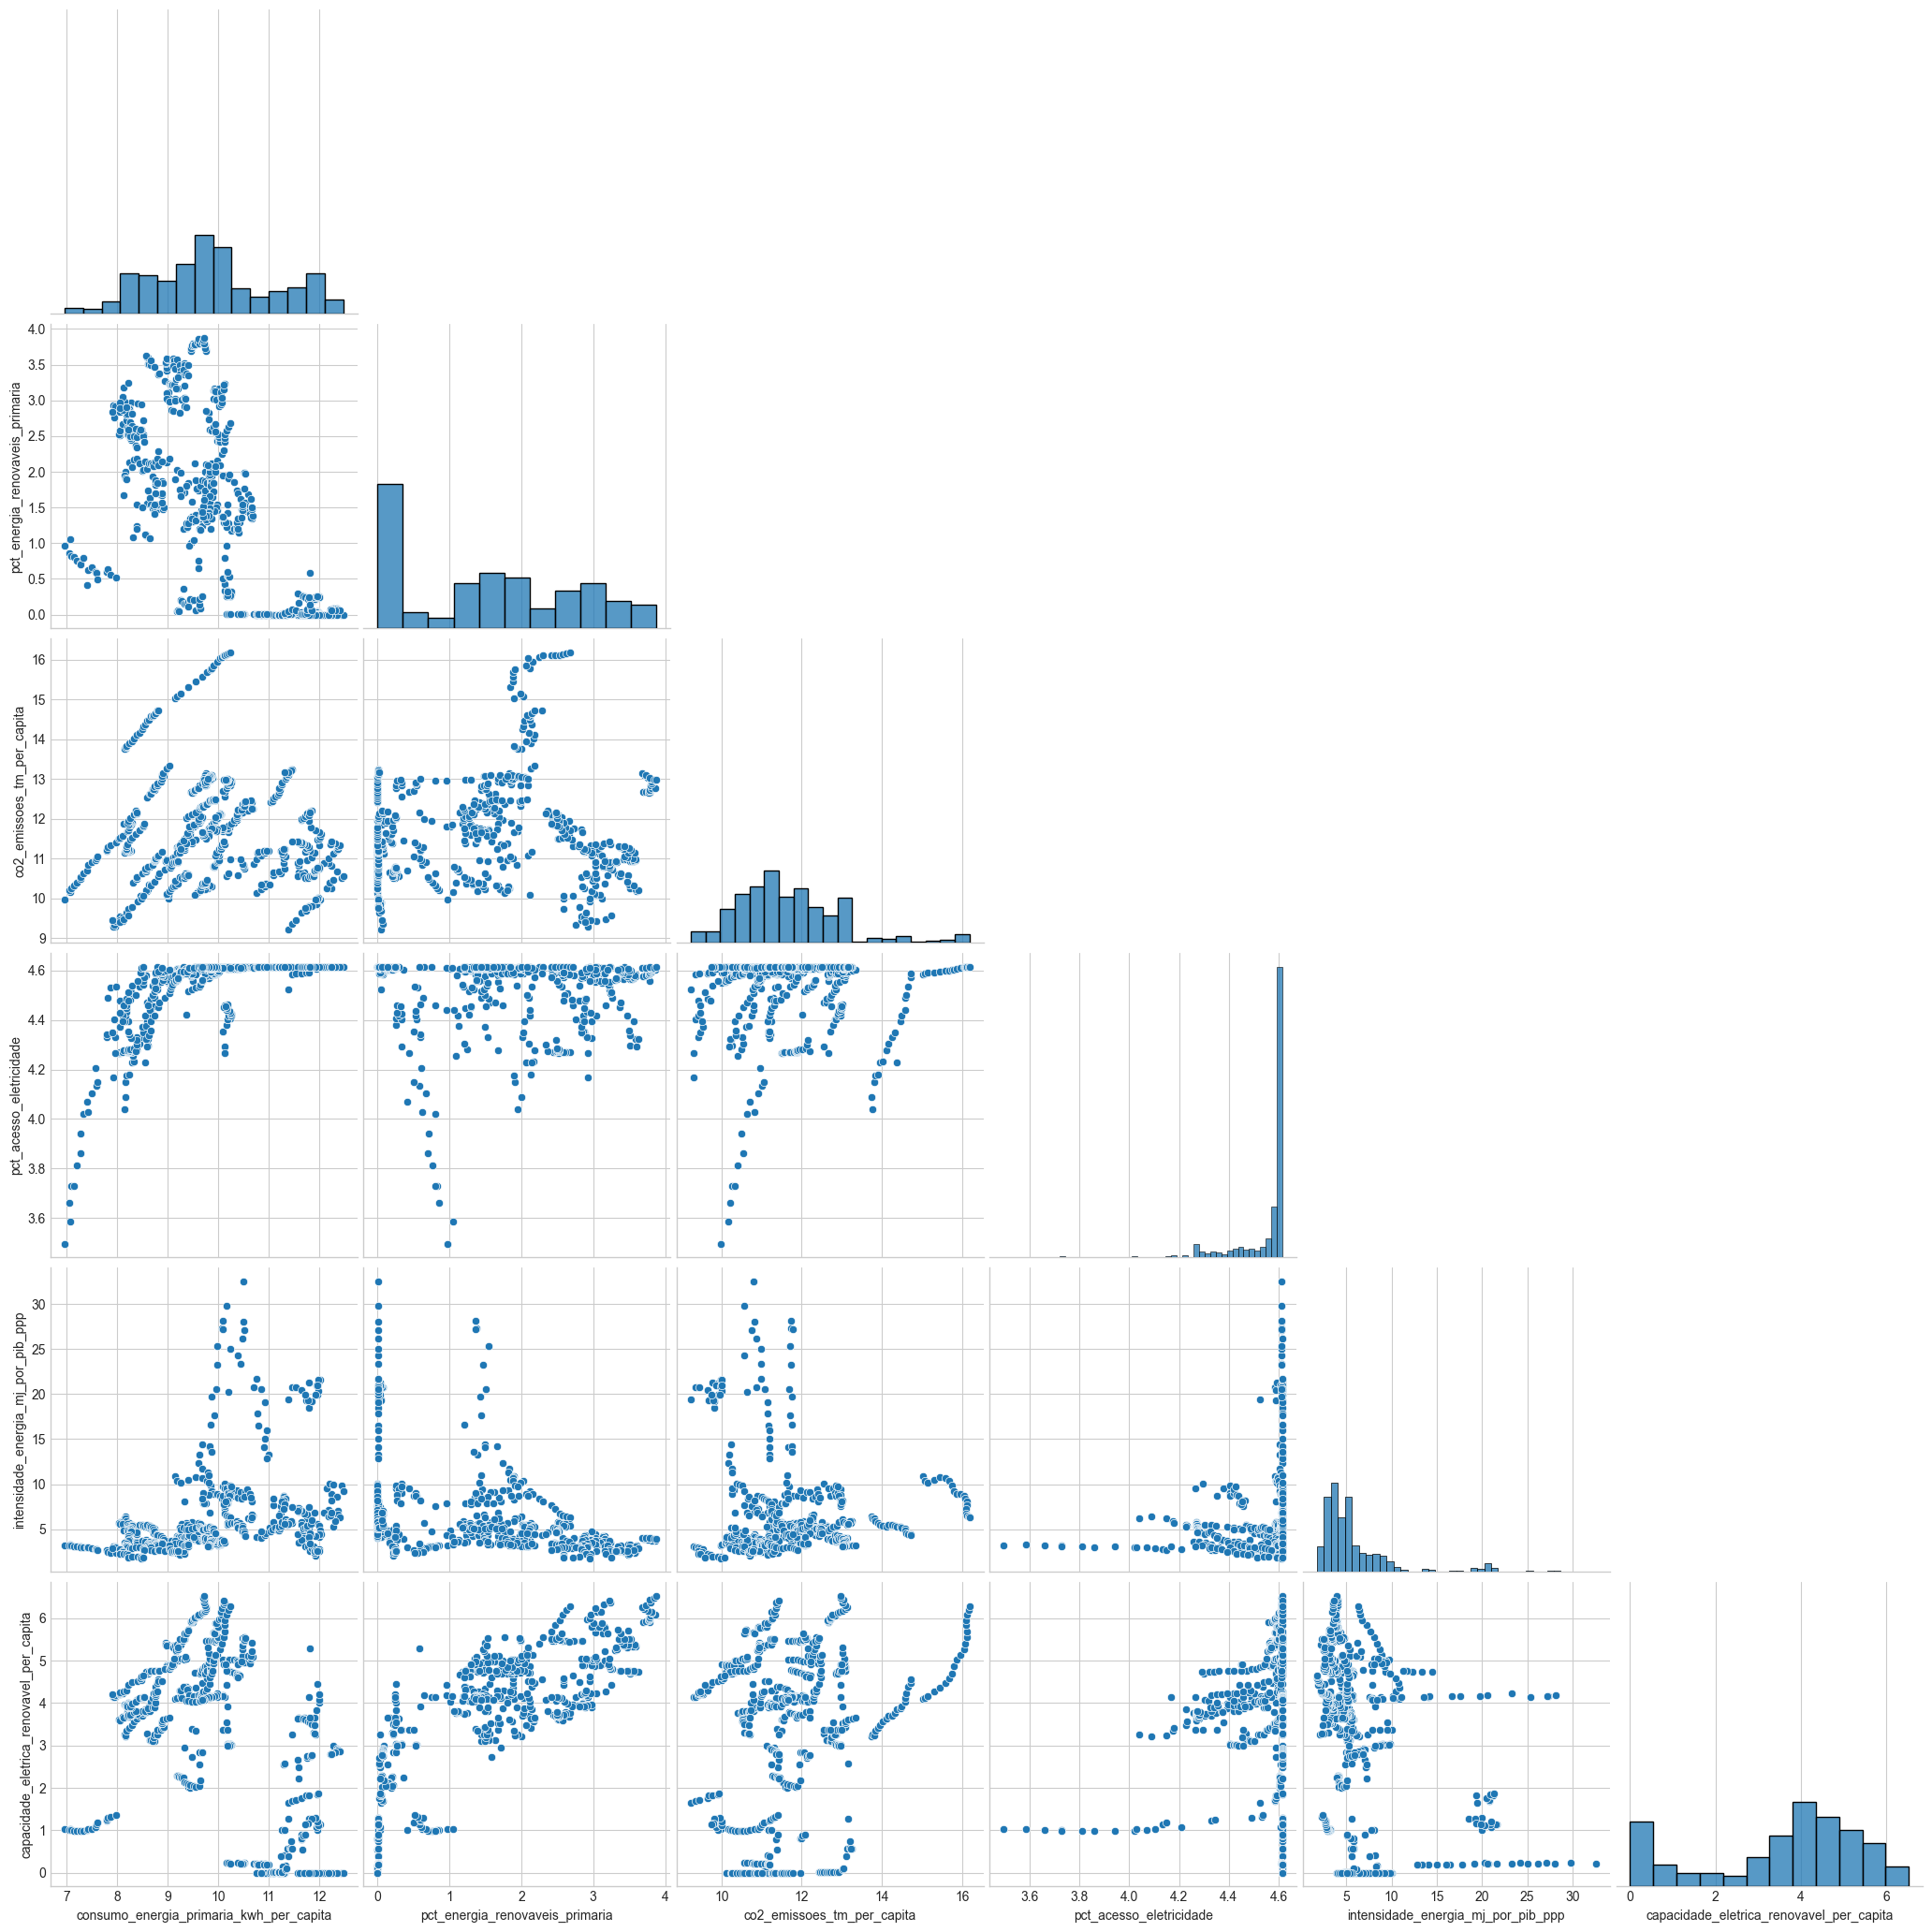

In [81]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

colunas_pad = df_energy_filtrado.select_dtypes(include='number').columns
colunas_pad = colunas_pad.drop("intensidade_energia_mj_por_pib_ppp")  # Excluir a variável resposta
df_energy_filtrado[colunas_pad] = df_energy_filtrado[colunas_pad].apply(np.log1p)


sns.pairplot(df_energy_filtrado, # Variáveis que queremos no pairplot
vars = cols[2:8],
    corner=True,
    height=3.5   # aumenta tamanho de cada gráfico
    )

### Relações lineares entre variáveis numéricas
 A matriz de correlação de Spearman entre as variáveis numéricas do dataset. O objetivo é identificar relações lineares fortes que possam informar próximas etapas (e.g., seleção de variáveis, multicolinearidade, ou insights de causa/efeito possível).

Pontos importantes:
- O coeficiente de Pearson varia de -1 a 1; 1 indica correlação positiva perfeita, -1 correlação negativa perfeita, e 0 nenhuma correlação linear.
- Correlação não implica causalidade: use estes resultados apenas como sinalizadores.
- Atenção a colinearidade: variáveis fortemente correlacionadas podem distorcer modelos que supõem independência entre variáveis (e.g., regressão).

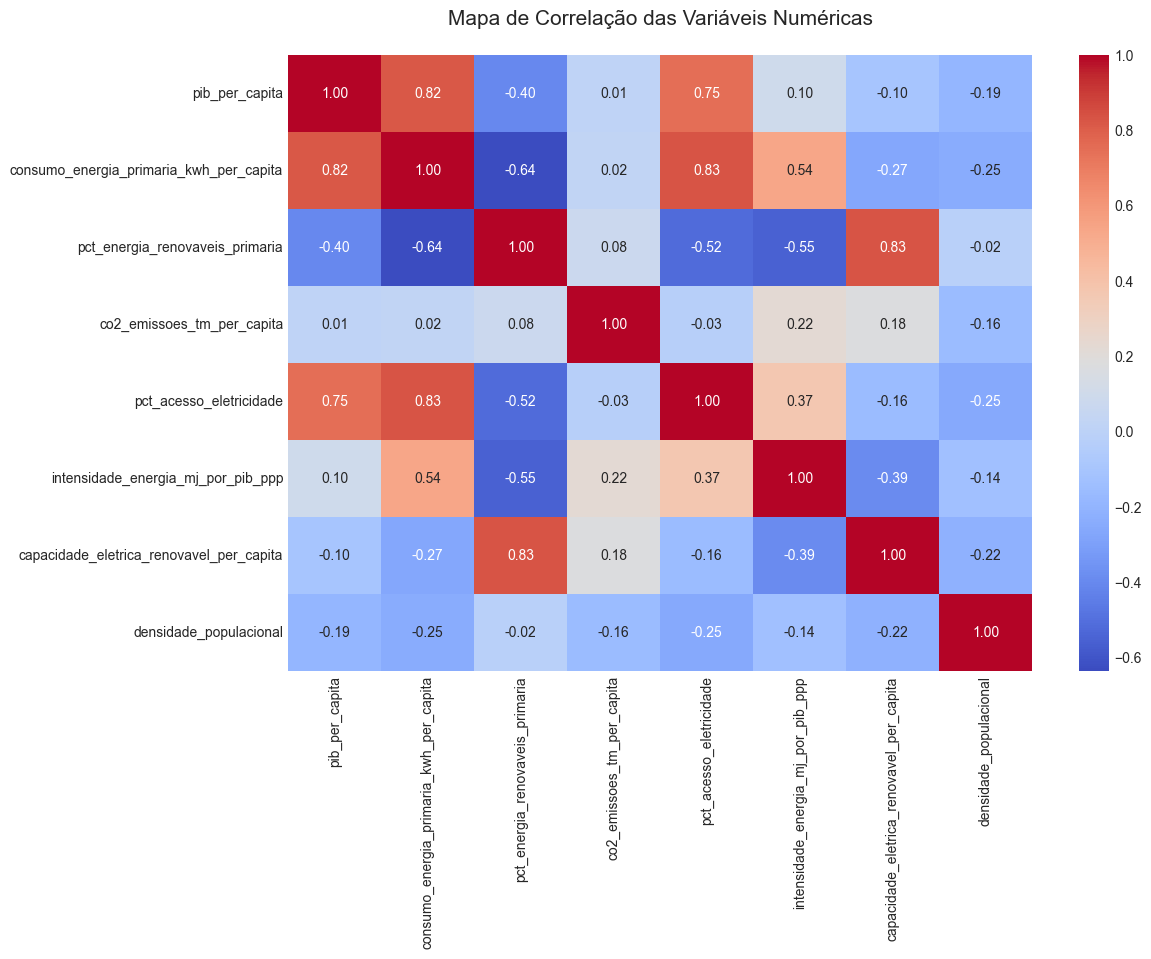

In [82]:
from scipy.stats import pearsonr

df_corr = df_energy_filtrado.corr(numeric_only=True, method = "spearman")
# # Heatmap# p
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', )
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize=15)
plt.show()

Diante das variáveis selecionadas, optou-se por prosseguir as análises sem as variáveis **pct_acesso_eletricidade**, **consumo_energia_primaria_kmh_per_capita**,**pct_energia_renovaveis_primamaria** uma vez que ela se encontram fortemente correlacionadas. Considerando essa elevada correlação, manteve-se no modelo apenas as demais variáveis, a fim de evitar problemas de multicolinearidade e possíveis distorções nas estimativas.

In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Exemplo de modelo GLM Poisson
modelo = smf.glm(
    formula="""
    intensidade_energia_mj_por_pib_ppp ~
    pib_per_capita +
    co2_emissoes_tm_per_capita +
    capacidade_eletrica_renovavel_per_capita +
    densidade_populacional
    """,
    data=df_energy_filtrado,
    family=sm.families.Gamma(link=sm.families.links.Log())
).fit()

# # Resumo do modelo
print(modelo.summary())


#resumo = logit.summary(xname=["intercepto", "Classe femínina", "Idade"]); resumo
#resumo.as_latex_tabular()
#logit.mle_retvals


                         Generalized Linear Model Regression Results                          
Dep. Variable:     intensidade_energia_mj_por_pib_ppp   No. Observations:                  620
Model:                                            GLM   Df Residuals:                      615
Model Family:                                   Gamma   Df Model:                            4
Link Function:                                    Log   Scale:                         0.38701
Method:                                          IRLS   Log-Likelihood:                -1536.4
Date:                                dom, 22 fev 2026   Deviance:                       173.18
Time:                                        14:08:29   Pearson chi2:                     238.
No. Iterations:                                    22   Pseudo R-squ. (CS):             0.2537
Covariance Type:                            nonrobust                                         
                                               coe

In [84]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecionar apenas as variáveis explicativas
X = df_energy_filtrado[
    [
    "pib_per_capita",
    "co2_emissoes_tm_per_capita",
    "capacidade_eletrica_renovavel_per_capita",
    "densidade_populacional"
    ]
]

# Adicionar constante (necessário para VIF correto)
X = sm.add_constant(X)

# Calcular VIF
vif_df = pd.DataFrame()
vif_df["Variável"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])]

vif_df

,Variável,VIF
0,const,164.901084
1,pib_per_capita,1.057578
2,co2_emissoes_tm_per_capita,1.065307
3,capacidade_eletrica_renovavel_per_capita,1.114168
4,densidade_populacional,1.023637


In [85]:
#logit.params
from matplotlib.pylab import exp #ou
import numpy as np
exp(modelo.conf_int(alpha=0.05)).round(3)


,0,1
Intercept,12.655,44.507
pib_per_capita,0.869,0.945
co2_emissoes_tm_per_capita,1.003,1.084
capacidade_eletrica_renovavel_per_capita,0.810,0.856
densidade_populacional,0.890,0.953


In [86]:
np.exp(modelo.params). round(3)

Intercept                                   23.732
pib_per_capita                               0.906
co2_emissoes_tm_per_capita                   1.042
capacidade_eletrica_renovavel_per_capita     0.833
densidade_populacional                       0.921
dtype: float64

Text(0, 0.5, 'Quantis observados')

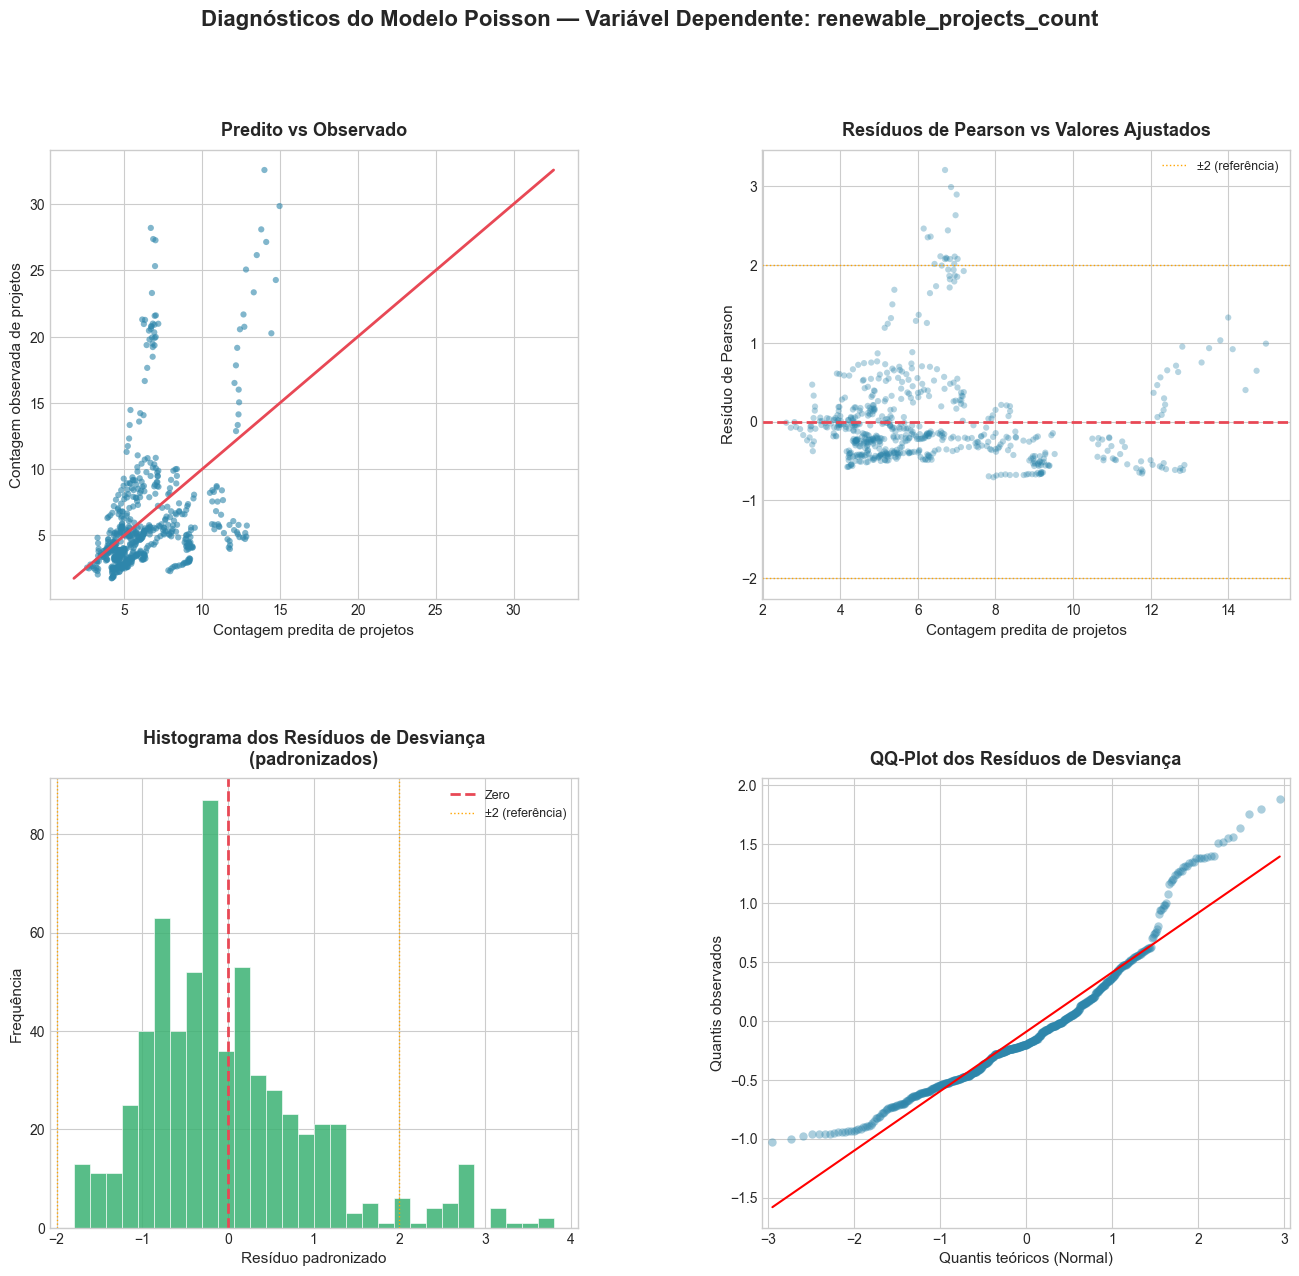

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np

# ============================================================
# PREPARAÇÃO DAS VARIÁVEIS PARA OS GRÁFICOS
# ============================================================

# y = valores OBSERVADOS (contagem de projetos)
y = df_energy_filtrado["intensidade_energia_mj_por_pib_ppp"].values

# yhat = valores preditos pelo modelo (média esperada da contagem)
yhat = modelo.mu

# resíduos de Pearson
resid_pearson = modelo.resid_pearson

# resíduos de desviança
resid_deviance = modelo.resid_deviance
resid_deviance_std = stats.zscore(resid_deviance)

# ============================================================
# CONFIGURAÇÃO VISUAL DOS GRÁFICOS
# ============================================================

plt.style.use("seaborn-v0_8-whitegrid")

fig = plt.figure(figsize=(16, 14))
fig.suptitle(
    "Diagnósticos do Modelo Poisson — Variável Dependente: renewable_projects_count",
    fontsize=16, fontweight="bold", y=0.98
)

gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

cores = {
    "pontos": "#2E86AB",
    "linha":  "#E84855",
    "barra":  "#3BB273",
    "fundo":  "#F7F7F7"
}

# ============================================================
# GRÁFICO 1 — PREDITO vs OBSERVADO (yhat vs y)
# ============================================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(
    yhat, y,
    alpha=0.6, color=cores["pontos"], edgecolors="none", s=20
)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], color=cores["linha"], linewidth=2)
ax1.set_title("Predito vs Observado", fontsize=13, fontweight="bold", pad=10)
ax1.set_xlabel("Contagem predita de projetos", fontsize=11)
ax1.set_ylabel("Contagem observada de projetos", fontsize=11)

# ============================================================
# GRÁFICO 2 — RESÍDUOS DE PEARSON vs VALORES AJUSTADOS
# ============================================================
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(
    yhat, resid_pearson,
    alpha=0.35, color=cores["pontos"], edgecolors="none", s=20
)
ax2.axhline(0, color=cores["linha"], linewidth=2, linestyle="--")
ax2.axhline(2,  color="orange", linewidth=1, linestyle=":", label="±2 (referência)")
ax2.axhline(-2, color="orange", linewidth=1, linestyle=":")

ax2.set_title("Resíduos de Pearson vs Valores Ajustados", fontsize=13, fontweight="bold", pad=10)
ax2.set_xlabel("Contagem predita de projetos", fontsize=11)
ax2.set_ylabel("Resíduo de Pearson", fontsize=11)
ax2.legend(fontsize=9)

# ============================================================
# GRÁFICO 3 — HISTOGRAMA DOS RESÍDUOS DE DESVÂNCIA
# ============================================================
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(
    resid_deviance_std,
    bins=30,
    color=cores["barra"],
    edgecolor="white",
    linewidth=0.5,
    alpha=0.85
)
ax3.axvline(0, color=cores["linha"], linewidth=2, linestyle="--", label="Zero")
ax3.axvline(-2, color="orange", linewidth=1, linestyle=":", label="±2 (referência)")
ax3.axvline(2,  color="orange", linewidth=1, linestyle=":")

ax3.set_title("Histograma dos Resíduos de Desviança\n(padronizados)", fontsize=13, fontweight="bold", pad=10)
ax3.set_xlabel("Resíduo padronizado", fontsize=11)
ax3.set_ylabel("Frequência", fontsize=11)
ax3.legend(fontsize=9)

# ============================================================
# GRÁFICO 4 — QQ-PLOT DOS RESÍDUOS DE DESVÂNCIA
# ============================================================
ax4 = fig.add_subplot(gs[1, 1])
from statsmodels import graphics
graphics.gofplots.qqplot(resid_deviance, line="r", ax=ax4, alpha=0.4,
                         markerfacecolor=cores["pontos"],
                         markeredgecolor="none")
ax4.set_title("QQ-Plot dos Resíduos de Desviança", fontsize=13, fontweight="bold", pad=10)
ax4.set_xlabel("Quantis teóricos (Normal)", fontsize=11)
ax4.set_ylabel("Quantis observados", fontsize=11)



### Predito vs Observado 

Observa-se que a maioria dos pontos está concentrada em valores baixos de contagem, indicando que o modelo consegue capturar bem os municípios com menor número de projetos. Alguns pontos com valores altos estão acima da linha de 45°, sugerindo que o modelo subestima contagens muito altas. Isso é típico em dados de contagem com sobredispersão.

Resíduos de Pearson vs Valores Ajustados 

Há uma grande dispersão dos resíduos em contagens baixas, o que indica variabilidade não totalmente explicada pelo modelo.
Alguns resíduos estão muito acima de ±2, confirmando possível sobredispersão e a presença de municípios com contagens inesperadamente altas.

### Histograma dos Resíduos de Desviança 

A distribuição é ligeiramente assimétrica à direita, novamente sugerindo que há valores extremos (municípios com muitos projetos). A maioria dos resíduos está dentro de ±2 desvios, mas há caudas longas, reforçando a necessidade de atenção a outliers.

### QQ-Plot dos Resíduos de Desviança 

A parte central segue aproximadamente a linha teórica, mas nas extremidades há desvios, indicando que os resíduos não seguem perfeitamente uma distribuição normal. Isso é esperado em GLMs de Poisson, especialmente com sobredispersão e contagens altas

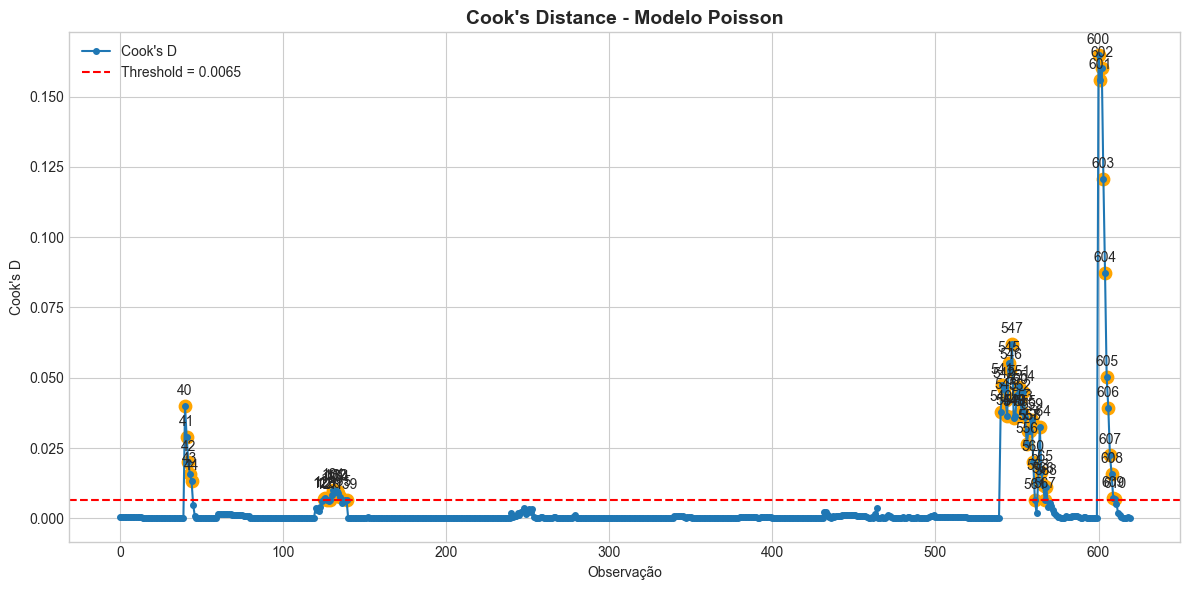

Número de observações influentes (Cook's D > 0.0065): 55


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================
# Extraindo dados do modelo
# ===========================
y = modelo.model.endog  # contagens observadas
fitted = modelo.fittedvalues  # valores ajustados pelo modelo

# ===========================
# Medidas de influência
# ===========================
influence = modelo.get_influence()
hat_values = influence.hat_matrix_diag  # alavancagem
cooks_d = influence.cooks_distance[0]   # distância de Cook

# Critério de Cook: observações influentes
n = len(y)
threshold = 4 / n
influential_points = np.where(cooks_d > threshold)[0]

# ===========================
# Plot Cook’s Distance
# ===========================
plt.figure(figsize=(12,6))
plt.plot(cooks_d, linestyle='-', marker='o', markersize=4, label="Cook's D")
plt.axhline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold:.4f}")

# Destacar observações influentes
for i in influential_points:
    plt.scatter(i, cooks_d[i], s=80, color='orange')
    plt.annotate(str(i),
                 (i, cooks_d[i]),
                 textcoords="offset points",
                 xytext=(0, 8),
                 ha='center')

plt.title("Cook's Distance - Modelo Poisson", fontsize=14, fontweight='bold')
plt.xlabel("Observação")
plt.ylabel("Cook's D")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Número de observações influentes (Cook's D > {threshold:.4f}): {len(influential_points)}")



In [95]:
influence = modelo.get_influence()
cook_d = influence.cooks_distance[0]

# Índices das observações influentes
mask_influentes = cook_d > 4/len(df_energy_filtrado)
indices_influentes = df_energy_filtrado.index[mask_influentes]

# Remover e reajustar
df_energy_filtrado = df_energy_filtrado.drop(index=indices_influentes)

modelo = smf.glm(
    formula="""
    intensidade_energia_mj_por_pib_ppp ~
    pib_per_capita +
    co2_emissoes_tm_per_capita +
    capacidade_eletrica_renovavel_per_capita +
    densidade_populacional
    """,
    data=df_energy_filtrado,
   family=sm.families.Gaussian(link=sm.families.links.Log())
).fit()

print(modelo.summary())

IndexError: boolean index did not match indexed array along axis 0; size of axis is 620 but size of corresponding boolean axis is 565

### Por que utilizar a função `exp` para interpretar os intervalos de confiança?

No modelo de regressão logística, os coeficientes estimados (coef) estão na escala de log-odds (logaritmo das chances). Essa escala não é diretamente interpretável em termos de probabilidades ou razões de chances (odds ratio). Para interpretar os coeficientes de forma mais intuitiva, é necessário transformá-los de volta para a escala de odds, o que é feito aplicando a função exponencial (`exp`).

- O fator multiplicativo para GDP é 0.9999, com um intervalo de confiança de aproximadamente [0.9998, 0.9999]. Isso significa que, para cada aumento unitário no PIB per capita, a contagem esperada de projetos de energia renovável diminui em cerca de 0.01%, mantendo as outras variáveis constantes.

- O fator multiplicativo para Total Energy Consumption é 1.0000, com um intervalo de confiança de aproximadamente [0.9999, 1.0001]. Isso indica que mudanças no consumo total de energia não alteram significativamente a contagem esperada de projetos.

- O fator multiplicativo para Renewable Energy Consumption é 1.051, com um intervalo de confiança de aproximadamente [1.049, 1.053]. Isso significa que, para cada aumento unitário na participação de energia renovável, a contagem esperada de projetos aumenta em cerca de 5.1%, com variação de 4.9% a 5.3% com 95% de confiança.

- O fator multiplicativo para CO₂ Emissions é 1.0000002, com intervalo de confiança de aproximadamente [1.00000018, 1.00000022]. Isso indica que cada aumento unitário nas emissões de CO₂ aumenta muito levemente a contagem esperada de projetos, mantendo as outras variáveis constantes.

- O fator multiplicativo para Electricity Access é 1.048, com um intervalo de confiança de aproximadamente [1.045, 1.051]. Isso significa que, para cada ponto percentual adicional no acesso à eletricidade, a contagem esperada de projetos aumenta em cerca de 4.8%, variando entre 4.5% e 5.1% com 95% de confiança.

- O fator multiplicativo para Energy Intensity é 0.903, com um intervalo de confiança de aproximadamente [0.897, 0.909]. Isso significa que, para cada aumento unitário na intensidade energética (MJ/$GDP), a contagem esperada de projetos diminui em cerca de 9.7%, variando entre 9.1% e 10.3% com 95% de confiança.
